# Lab 2: EDA with found data

Jan 30, 2020;
This lab available via [https://github.com/data-ppf/data-ppf.github.io/blob/master/labs/Lab2_2020.ipynb](https://github.com/data-ppf/data-ppf.github.io/blob/master/labs/Lab2_2020.ipynb)

In this lab you will 

1. continue our exercise from Lab 1 (Jan 24, 2020), in which we examined some "real world" datasets of interest

2. make this exploration quantiative and visual. The term of art for this is "Exploratory Data Analysis" following the 1977 book of [John Tukey](https://en.wikipedia.org/wiki/John_Tukey) of Princeton/Bell Labs (more on him when we get to post-WWII data)

Continuing a point made last week and this week about "[multiliteracies](https://www.amazon.com/Multiliteracies-Digital-Studies-Writing-Rhetoric/dp/0809325519)", be mindful of the functional, critical, and rhetorical capabilities we're learning.

- Critical, in the sense that we interrogate the data just like any other source, as to their origin, subjectivities, and assumptions/presumptions/biases

- Functional, in the sense that we're learning to use software for this interrogation

- Rhetorical, in that we will draw conclusions and then use the data to argue for these conclusions

The specific functional capability we'll focus on today is exploratory data anlysis in "[pandas](https://en.wikipedia.org/wiki/Pandas_(software)")

## digression on `import` in python

Part of the benefit in 2020 of Python is that the open source developer community contributes to Python via "modules", code bases which are easily imported. Today we will use Pandas heavily, one such module designed to make data manipulation easier. The module import below illustrates exactly how much easier it is to code in 2020 using Python than in the programming environments many of us geezers first learned in.

In [1]:
import antigravity

## Getting Started

On Tuesday the groups identified several datasets of particular interest, e.g.,

1. [Contraceptive Method Choice Data Set](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice)

which is about people and highlights several issues raised by Wallach, boyd, Crawford.

Some others from previous years, also about people:

2. [Entree Chicago Recommendation Data Data Set](https://archive.ics.uci.edu/ml/datasets/Entree+Chicago+Recommendation+Data)
3. [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime)

and some others, about other:

4. [Wine Data Set](https://archive.ics.uci.edu/ml/datasets/Wine)
5. [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)


As you all pointed out tuesday, each of these data sets exemplifies fascinating subjective design choices and potential uses. Let's put them to work.

Our lectures and readings so far have been about the tensions and politics arising from data about people, so let's start with the data about people.

First, we will import, as did our friend in the cartoon above, modules that will let us do lots quickly. Rather than importing antigravity, we'll import some powerful tools for importing and working with data, especially `pandas`.

Pandas has been in development since 2008, largely through the efforts of one developer. For more on the history see [here](https://en.wikipedia.org/wiki/Pandas_(software)).


In [2]:
import pandas

# crime data

Using a command or "method" called `read_csv` we can import the data we found on the web.

We can then easily list this data by just calling the variable we assigned it to:

In [27]:
UCR = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data")

In [28]:
UCR

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1989,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1990,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1991,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


Great!

Scroll to the bottom in the cell below.

 we have 
- 1993 rows (aka "examples") and 
- 128 columns (aka features, dimensions, attributes)

Pandas attempts to automatically format the data, but the data itself may not always be in a format that pandas can interpret correctly. In the case above, we can see that row 0 is really part of the data label and is not data itself. Let's fix that by augmenting the command slightly:

In [29]:
UCR = pandas.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data",
    header=None
)

In [30]:
UCR.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


here's a handy pandas command to `describe` (summarize) the data:

In [7]:
UCR.describe()

,0,4,5,6,7,8,9,10,11,12,...,96,97,98,99,100,118,119,120,125,127
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ok great. now what? Exploring data would be easier if the column names had some meaning. 
Let's do that by extracting from UCI as well

In [31]:
colnames = [
    "state", "county", "community", "communityname", "fold", "population",
    "householdsize", "racepctblack", "racePctWhite", "racePctAsian",
    "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up",
    "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf",
    "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc",
    "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap",
    "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov",
    "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed",
    "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu",
    "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv",
    "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par",
    "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom",
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5",
    "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5",
    "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly",
    "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
    "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR",
    "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded",
    "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb",
    "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ",
    "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc",
    "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet",
    "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85",
    "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps",
    "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop",
    "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite",
    "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor",
    "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked",
    "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg",
    "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn",
    "PolicBudgPerPop", "ViolentCrimesPerPop"
]

for the curious, I generated the above in 1 line of OSX-UNIX using:

```bash
curl https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names | grep ^@attribute | awk '{print "'"'"'"$2"'"'"'"}' | tr '\n' ',' | sed -e 's/,$/]/' | awk '{print "colnames=["$0}' | pbcopy
```

We can change the column names of `UCR` by setting `UCR.columns` equal to `colnames`.

In [32]:
UCR.columns = colnames

How about just looking at the population column? We use [square brackets] to pick out the column `'population'`.

In [33]:
UCR["population"]

0       0.19
1       0.00
2       0.00
3       0.04
4       0.01
        ... 
1989    0.01
1990    0.05
1991    0.16
1992    0.08
1993    0.20
Name: population, Length: 1994, dtype: float64

We can get some basic statistics about a column using the `.describe` method

In [34]:
UCR["population"].describe()

count    1994.000000
mean        0.057593
std         0.126906
min         0.000000
25%         0.010000
50%         0.020000
75%         0.050000
max         1.000000
Name: population, dtype: float64

Discussion: Why is "population" a number between (min) 0, and (max) 1?

## Data exploration with graphics

How about some graphics? We can import a snazzy library called `matplotlib`. (Note that the first time you run this your computer may have to do a bunch of stuff.)

In [3]:
import matplotlib.pyplot
%matplotlib notebook

Now let's make a histogram, and divide the population into 100 "bins."

<IPython.core.display.Javascript object>


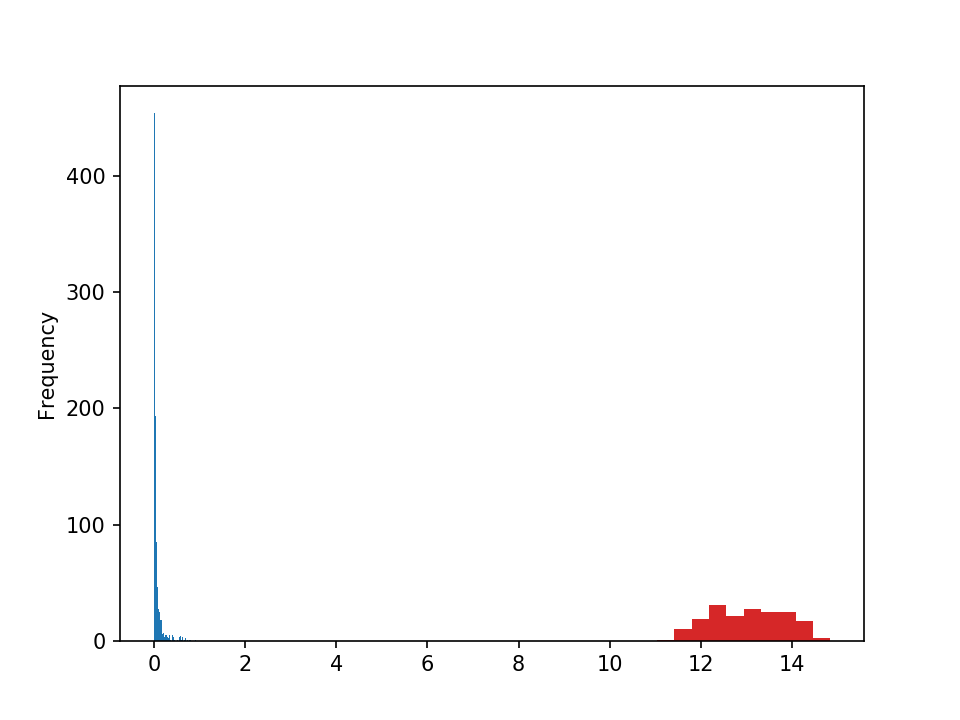

In [58]:
population_fig, population_axes = matplotlib.pyplot.subplots()
UCR["population"].plot.hist(bins=100, ax=population_axes)

What does this tell us about the sizes of cities?

This being crime data, and this being the barely past Jim Crow United State, race is a central category that people collect and attempt to make major claims.

How concentrated are white communities?

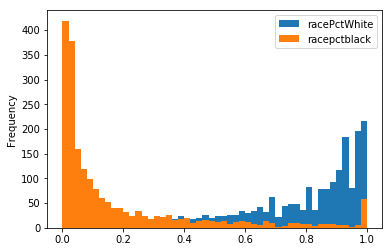

In [14]:
conc_fig, conc_axes = matplotlib.pyplot.subplots()
UCR["racePctWhite"].plot.hist(bins=50, ax=conc_axes, label="racePctWhite")
UCR["racepctblack"].plot.hist(bins=50, ax=conc_axes, label="racepctblack")
conc_axes.legend()

Often when exploring data, we're on the lookout for correlated variables. As always correlation doesn't equal causation. [correlation](https://imgs.xkcd.com/comics/correlation.png)

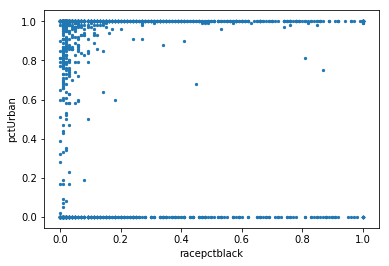

In [15]:
UCR.plot.scatter(x="racepctblack", y="pctUrban", marker=".")

What are all the values clustered at 0 and 1? What does this represent in the data? 


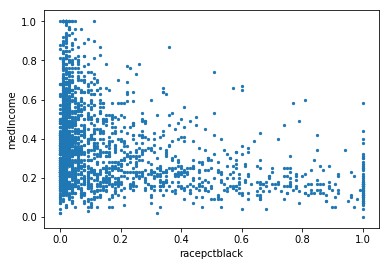

In [16]:
UCR.plot.scatter(x="racepctblack", y="medIncome", marker=".")

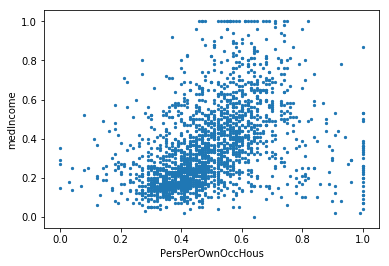

In [17]:
UCR.plot.scatter(x="PersPerOwnOccHous", y="medIncome", marker=".")

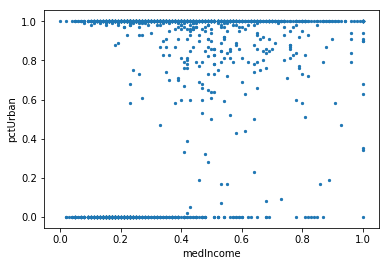

In [18]:
UCR.plot.scatter(x="medIncome", y="pctUrban", marker=".")

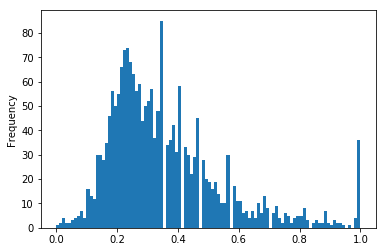

In [19]:
population_fig, population_axes = matplotlib.pyplot.subplots()
UCR["perCapInc"].plot.hist(bins=100, ax=population_axes)

Look at all the variables in the [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) and make at least 3 scatter plots of your own.

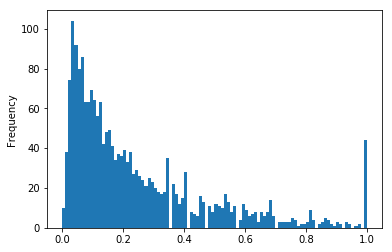

In [20]:
UCR['ViolentCrimesPerPop'].plot.hist(bins=100, ax=matplotlib.pyplot.subplots()[1])

Up to now we've picked out columns or rows by designating them explicitly. We can also pick out all the columns and/or rows that satisfy some criterion. 
To ask for all the rows where UCR.ViolentCrimesPerPop is equal to one we ask for 
`UCR.ViolentCrimesPerPop==1`

NOTA BENE that we used two equals signs `==` not one `=`.


In [21]:
UCR.ViolentCrimesPerPop == 1

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1964    False
1965    False
1966    False
1967    False
1968    False
1969    False
1970    False
1971    False
1972    False
1973    False
1974    False
1975    False
1976    False
1977    False
1978    False
1979    False
1980    False
1981    False
1982    False
1983    False
1984    False
1985    False
1986    False
1987    False
1988    False
1989    False
1990    False
1991    False
1992    False
1993    False
Name: ViolentCrimesPerPop, Length: 1994, dtype: bool

We can then pull out only those rows--all the `True`s above. To get just the names of communities with `UCR.ViolentCrimesPerPop==1` we can ask:

In [22]:
UCR.communityname[UCR.ViolentCrimesPerPop == 1]

82                Vernoncity
146           BatonRougecity
149            PlantCitycity
248          Spartanburgcity
333         AtlanticCitycity
362           Birminghamcity
400            Mansfieldcity
410           FortPiercecity
413            Baltimorecity
420             Annistoncity
447        Irvingtontownship
457            Homesteadcity
462             Commercecity
499        SanBernardinocity
564           LosAngelescity
667              Atlantacity
678                Daniacity
776           EastOrangecity
810              Palatkacity
828       Wilkinsburgborough
841             SanPablocity
909           KansasCitycity
955             Prichardcity
957        WestHollywoodcity
998              Lynwoodcity
1001             Opelikacity
1025           Greenwoodcity
1041        PompanoBeachcity
1044          Washingtoncity
1056           Hawthornecity
1119            Bessemercity
1134               Miamicity
1154             Chestercity
1159             Oaklandcity
1208    Cityof

We can also just pull all the ROWS that satify such a condition.

In [23]:
UCR.loc[UCR["ViolentCrimesPerPop"] == 1.0]

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
82,48,?,?,Vernoncity,1,0.00,0.42,0.21,0.65,0.04,...,0.02,0.12,0.02,?,?,?,?,0.00,?,1.0
146,22,?,?,BatonRougecity,1,0.34,0.43,0.86,0.30,0.10,...,0.21,0.25,0.11,0.55,0.07,0.42,0.5,0.35,0.13,1.0
149,12,?,?,PlantCitycity,1,0.02,0.47,0.41,0.63,0.03,...,0.06,0.09,0.00,?,?,?,?,0.00,?,1.0
248,45,?,?,Spartanburgcity,2,0.05,0.41,0.89,0.28,0.05,...,0.05,0.20,0.13,0.03,0.01,0.84,0,1.00,0.16,1.0
333,34,1,2080,AtlanticCitycity,2,0.04,0.31,1.00,0.01,0.24,...,0.03,0.28,1.00,?,?,?,?,0.00,?,1.0
362,1,?,?,Birminghamcity,2,0.41,0.37,1.00,0.02,0.03,...,0.43,0.15,0.20,0.36,0.13,0.74,0.5,0.38,0.2,1.0
400,39,139,47138,Mansfieldcity,3,0.07,0.36,0.35,0.71,0.04,...,0.08,0.15,0.07,?,?,?,?,0.00,?,1.0
410,12,?,?,FortPiercecity,3,0.04,0.41,0.83,0.29,0.03,...,0.03,0.25,0.17,?,?,?,?,0.00,?,1.0
413,24,510,4000,Baltimorecity,3,1.00,0.44,1.00,0.07,0.06,...,0.23,0.76,1.00,0.67,0.58,0.74,0,0.36,0.34,1.0
420,1,?,?,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,...,0.06,0.11,0.04,?,?,?,?,0.00,?,1.0


In [24]:
UCR.plot.scatter(x="medIncome", y="ViolentCrimesPerPop", marker=".", alpha=0.2)

note that many interesting data are missing in the UCR set, e.g.,

In [25]:
UCR['PolicPerPop'].value_counts()

?       1675
0.2       19
0.1       19
0.15      18
0.19      16
0.16      16
0.18      15
0.17      15
0.14      15
0.13      14
0.25      13
0.09      12
0.12      12
0.21      11
0.11      10
0.26       9
0.28       9
0.08       8
0.24       7
0.27       7
0.22       7
0.23       5
1          5
0.33       4
0.35       4
0.29       4
0.3        4
0.02       3
0.38       3
0.43       3
0.4        2
0.31       2
0.68       2
0.5        2
0.07       2
0.03       2
0.37       2
0.39       2
0.32       2
0.98       1
0.41       1
0.64       1
0.67       1
0.04       1
0.83       1
0.85       1
0.34       1
0.55       1
0.42       1
0.06       1
0.72       1
0.05       1
0          1
Name: PolicPerPop, dtype: int64

# Contraceptive Method Choice Data Set 

In [26]:
cmc = pandas.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data",
    header=None
)

In [27]:
cmc.describe()

,0,1,2,3,4,5,6,7,8,9
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


(don't try this at home:)

```bash
curl https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.names | grep -A 12 'Attribute Information' | grep '^   [0-9]' | cut -d\( -f1 | cut -d\. -f2 | expand | tr '?'"'"'' '_' | sed -e 's/^[ ]*//' -e 's/[ ]*$//' | tr ' ' '-' | awk '{print "+"$0"+"}' | tr '+' ''"'"'' | tr '\n' ',' | sed -e 's/,$//' | awk '{print "["$0"]"}' | pbcopy
```

In [28]:
colnames = [
    "Wife_s-age", "Wife_s-education", "Husband_s-education",
    "Number-of-children-ever-born", "Wife_s-religion", "Wife_s-now-working_",
    "Husband_s-occupation", "Standard-of-living-index", "Media-exposure",
    "Contraceptive-method-used"
]

In [29]:
cmc.columns = colnames

In [30]:
cmc["Contraceptive-method-used"].value_counts()

1    629
3    511
2    333
Name: Contraceptive-method-used, dtype: int64

Text(0, 0.5, 'Count')

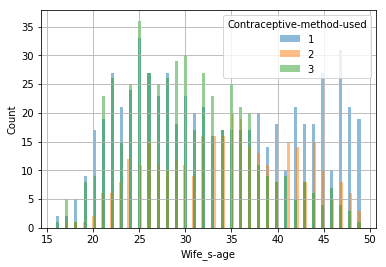

In [31]:
cmc_fig, cmc_axes = matplotlib.pyplot.subplots()
cmc_series = cmc.groupby("Contraceptive-method-used")["Wife_s-age"].hist(ax=cmc_axes, alpha=0.5,bins=100)
cmc_axes.legend(cmc_series.axes[0], title=cmc_series.index.name)
cmc_axes.set_xlabel("Wife_s-age")
cmc_axes.set_ylabel("Count")

# Wine & Wine Quality Data Set

Let's look now at the wine data set. This data requires a bit more work to get the data in the format we want. If you take a look at the raw data, you'll notice that it's separated by semicolons rather than commas. In the `read_csv` function, we're going to pass an additional parameter called `sep`. This tells the function that instead of the data being separated by commas, it's being separated by something else, in this case a semicolon. 


In [44]:
#wine_data = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

wine_data = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [45]:
wine_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [49]:
col_names = ["Class identifier", "Alcohol", "Malic acid", "Ash", 
 "Alcalinity of ash", "Magnesium", 
 "Total phenols", "Flavanoids", "Nonflavanoid phenols", 
 "Proanthocyanins", "Color intensity", "Hue", 
 "Dilution", "Proline"]
wine_data.columns = col_names

In [50]:
wine_data.describe()

,Class identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<IPython.core.display.Javascript object>


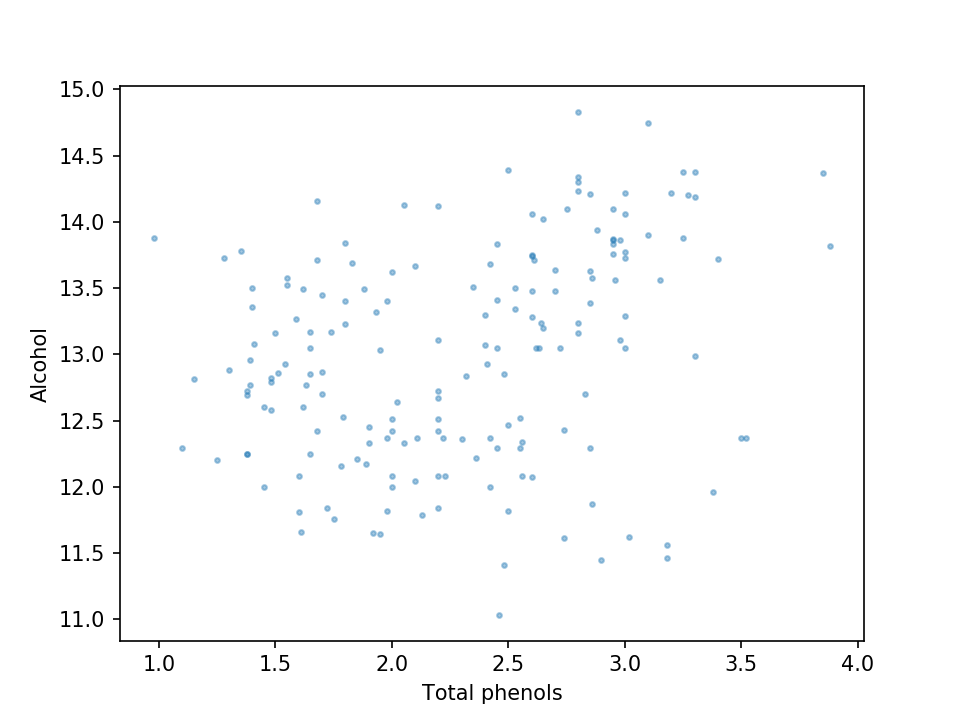

In [52]:
wine_data.plot.scatter(x="Total phenols", y="Alcohol", marker=".", alpha=0.4)

<IPython.core.display.Javascript object>


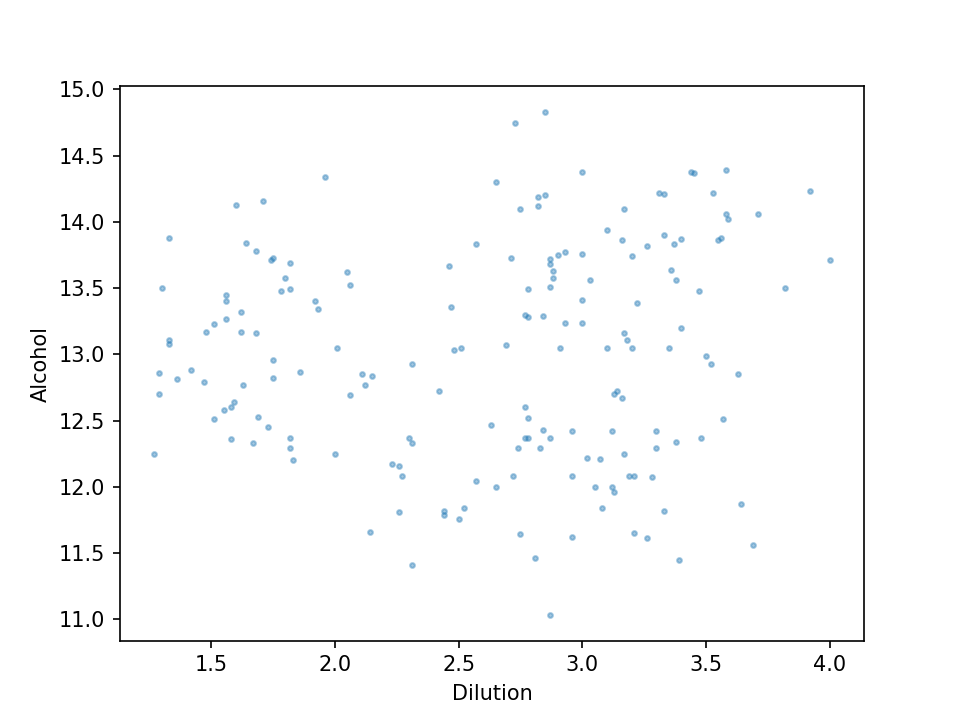

In [57]:
wine_data.plot.scatter(x="Dilution", y="Alcohol", marker=".", alpha=0.4)

<IPython.core.display.Javascript object>


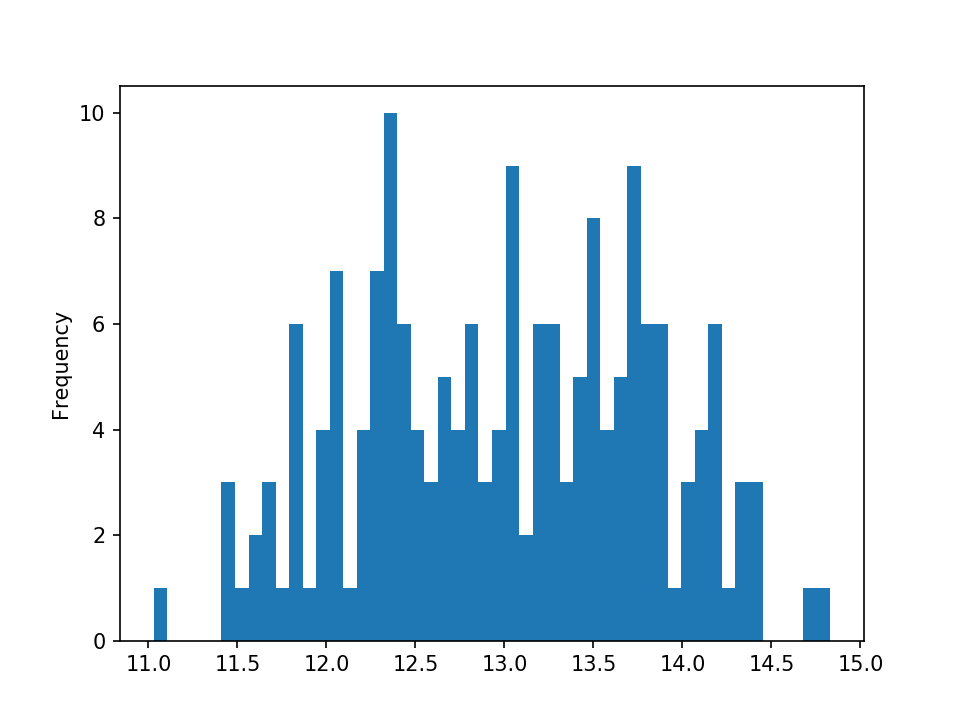

In [66]:
wine_fig, wine_axes = matplotlib.pyplot.subplots()
wine_data["Alcohol"].plot.hist(bins=50, ax=wine_axes)


It's often useful to show more than 2 attributes of a data set in one chart, especially if they might all related. Here, we can make a scatterplot where the size of each dot represents another attribute.

<IPython.core.display.Javascript object>


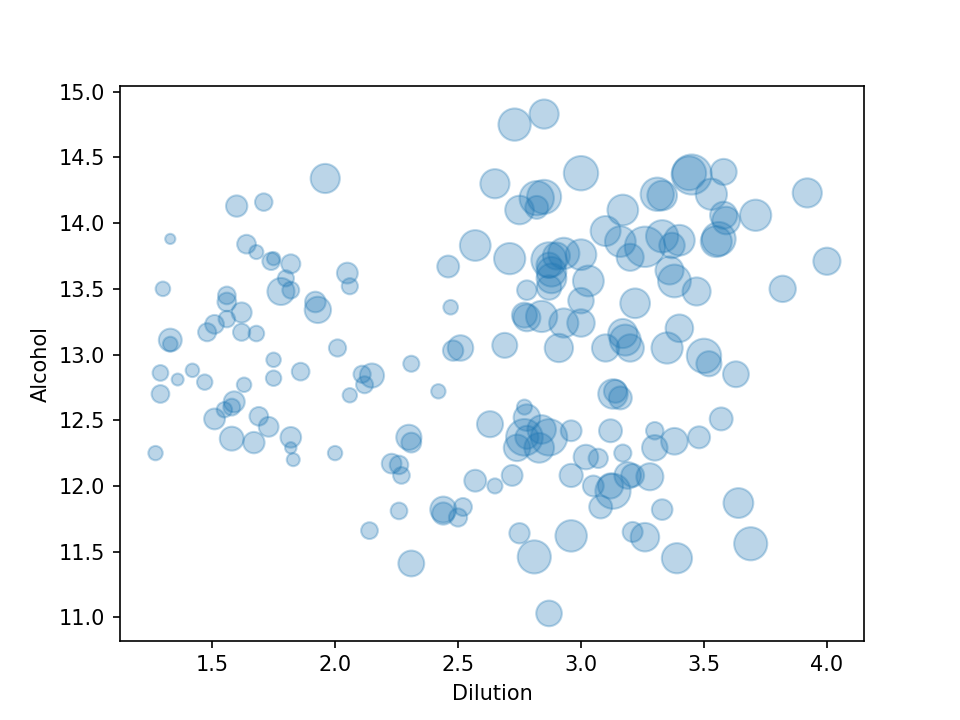

In [84]:
size = wine_data["Total phenols"][:]*wine_data["Total phenols"][:]*100
wine_data.plot.scatter(x="Dilution", y="Alcohol", marker=".", alpha=0.3, s=size)

We can even include a 4th attribute on the graph by changing the color of each dot. Let's make the color correspond to the amount of magnesium in the wine.

<IPython.core.display.Javascript object>


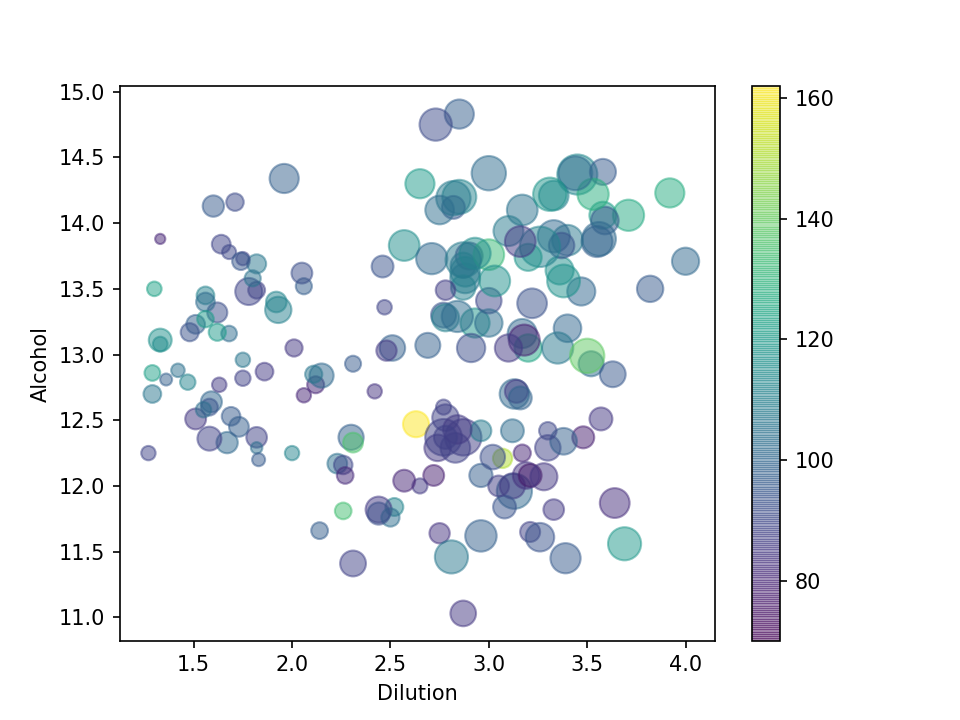

In [95]:
size = wine_data["Total phenols"][:]*wine_data["Total phenols"][:]*100
colors = wine_data["Magnesium"]
wine_data.plot.scatter(x="Dilution", y="Alcohol", marker=".", alpha=0.5, s=size, c=colors, cmap="viridis")

# Congressional Voting Records Data Set
[link](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

In [9]:
cvr  = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data' , na_values=['?'])

cvr.replace(r'^y$', value="Yes", regex=True, inplace=True)
cvr.replace(r'^n$', value="No", regex=True, inplace=True)

cvr.fillna('?', inplace=True)

In [10]:
cvr.shape

(434, 17)

In [11]:

colnames = [  "party","handicapped_infants","water_project_cost_sharing","adoption_of_the_budget_resolution",
            "physician_fee_freeze","el_salvador_aid","religious_groups_in_schools",
            "anti_satellite_test_ban","aid_to_nicaraguan_contras"
            ,"mx_missile",
  "immigration","synfuels_corporation_cutback","education_spending",
"superfund_right_to_sue","crime","duty_free_exports","export_administration_act_south_africa"]
cvr.columns = colnames

In [12]:
cvr.head()

,party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,No,?
1,democrat,?,Yes,Yes,?,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No
2,democrat,No,Yes,Yes,No,?,Yes,No,No,No,No,Yes,No,Yes,No,No,Yes
3,democrat,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,?,Yes,Yes,Yes,Yes
4,democrat,No,Yes,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes,Yes


In [13]:
cvr.describe().T

,count,unique,top,freq
party,434,2,democrat,267
handicapped_infants,434,3,No,235
water_project_cost_sharing,434,3,Yes,194
adoption_of_the_budget_resolution,434,3,Yes,253
physician_fee_freeze,434,3,No,247
el_salvador_aid,434,3,Yes,211
religious_groups_in_schools,434,3,Yes,271
anti_satellite_test_ban,434,3,Yes,239
aid_to_nicaraguan_contras,434,3,Yes,242
mx_missile,434,3,Yes,207


In [14]:
cvr.handicapped_infants.value_counts()

No     235
Yes    187
?       12
Name: handicapped_infants, dtype: int64

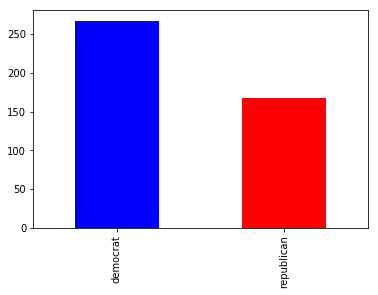

In [15]:
cvr.party.value_counts().plot(kind = 'bar',color=['blue','red'])


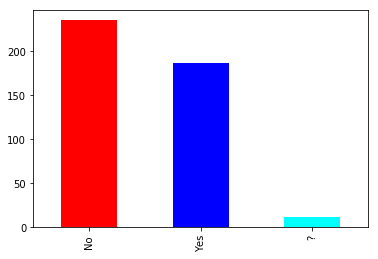

In [16]:
cvr.handicapped_infants.value_counts().plot(kind = 'bar',color=['red','blue','cyan'])

What if we want to see these votes broken down by party?


In [17]:
ydem = sum(cvr.party[cvr.handicapped_infants=="Yes"]=='democrat')
yrep = sum(cvr.party[cvr.handicapped_infants=="Yes"]=='republican')

ndem = sum(cvr.party[cvr.handicapped_infants=="No"]=='democrat')
nrep = sum(cvr.party[cvr.handicapped_infants=="No"]=='republican')

und = len(cvr.party[cvr.handicapped_infants=="?"])
ydem,yrep,ndem,nrep,und

(156, 31, 102, 133, 12)

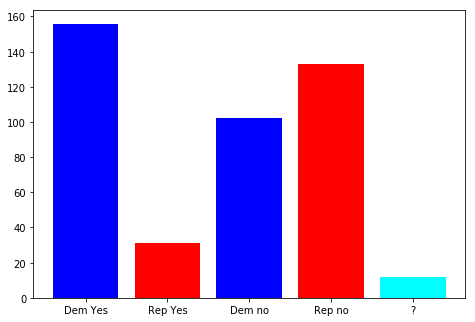

In [20]:
fig = matplotlib.pyplot.figure()
axes = fig.add_axes([0,0,1,1])
count = [ydem,yrep,ndem,nrep,und]
label = ['Dem Yes','Rep Yes',"Dem no","Rep no","?"]
axes.bar(label,count,color=['blue', 'red', 'blue', 'red', 'cyan'])
matplotlib.pyplot.show()

What about a bill on crime?

In [21]:
ydem = sum(cvr.party[cvr.crime=="Yes"]=='democrat')
yrep = sum(cvr.party[cvr.crime=="Yes"]=='republican')

ndem = sum(cvr.party[cvr.crime=="No"]=='democrat')
nrep = sum(cvr.party[cvr.crime=="No"]=='republican')

und = len(cvr.party[cvr.crime=='?'])
ydem,yrep,ndem,nrep,und

(90, 157, 167, 3, 17)

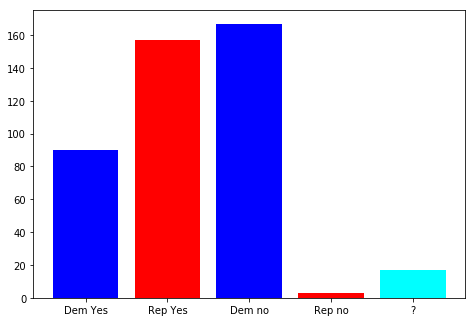

In [22]:
fig = matplotlib.pyplot.figure()
axes = fig.add_axes([0,0,1,1])
count = [ydem,yrep,ndem,nrep,und]
label = ['Dem Yes','Rep Yes',"Dem no","Rep no","?"]
axes.bar(label,count,color=['blue', 'red', 'blue', 'red', 'cyan'])
matplotlib.pyplot.show()

(There is a problem with this analysis... The number of democrats is not the same as the republicans)


In [ ]:
#new_cvr = pd.melt(cvr,'party')
#new_cvr.head

# Your turn with EDA:

1. What other facets of these data could we be exploring?
- as summary statistics
- as plots

Try it!

2. What other datasets, e.g., from UCI, could we be exploring?
- about people
- about anything!

Try it!